# Binary Classification of Insurance Cross Selling<br>(保険クロスセルの二分法)
* 期間：2024.07.01-2024.07.31
* 参加期間：2024.07.13-
* タイトル：[Binary Classification of Insurance Cross Selling](https://www.kaggle.com/competitions/playground-series-s4e7)
* 目標:このコンテストの目的は、どの顧客が自動車保険のオファーに好意的に反応するかを予測することです。
* ターゲット：Response(おそらく0が非好意的反応、1が好意的反応)
* 評価指標：提出物は、予測確率と真実ターゲットを使用したROC 曲線の下の領域を使用して評価されます。

---

# ライブラリ

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


---

# データの確認

In [9]:
df_train = pd.read_csv('train.csv')
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [10]:
df_test = pd.read_csv('test.csv')
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


In [11]:
#データ数の確認
print('トレーニングデータ数')
print(df_train.shape)
print('テストデータ数')
print(df_test.shape)

トレーニングデータ数
(11504798, 12)
テストデータ数
(7669866, 11)


In [12]:
#欠損値、Dtypeの確認
print('トレーニングデータ')
print(df_train.info())

トレーニングデータ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB
None


In [13]:
print('テストデータ')
print(df_test.info())

テストデータ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7669866 entries, 0 to 7669865
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 643.7+ MB
None


In [14]:
print('トレーニングデータ')
print()
# 欠損値の有無を確認する
missing_values = df_train.isna().sum()

# 結果を出力する
print("各列の欠損値の数:")
print(missing_values)

# 欠損値があるかどうかを確認する
if missing_values.any():
    print("欠損値があります。")
else:
    print("欠損値はありません。")

トレーニングデータ

各列の欠損値の数:
id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64
欠損値はありません。


In [15]:
print('テストデータ')
print()

# 欠損値の有無を確認する
missing_values = df_test.isna().sum()

# 結果を出力する
print("各列の欠損値の数:")
print(missing_values)

# 欠損値があるかどうかを確認する
if missing_values.any():
    print("欠損値があります。")
else:
    print("欠損値はありません。")

テストデータ

各列の欠損値の数:
id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64
欠損値はありません。


In [16]:
#カラム名の取得
columns_df_train = df_train.columns
columns_df_test = df_test.columns

print('トレーニングデータ')
print(columns_df_train)
print(f'カラム数は、{len(columns_df_train)}個')
print('テストデータ')
print(columns_df_test)
print(f'カラム数は、{len(columns_df_test)}個')

トレーニングデータ
Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')
カラム数は、12個
テストデータ
Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')
カラム数は、11個


# 前処理

## 前処理用関数

In [17]:
#カラム内のユニークなデータの取得
def get_data_unique(column_name):
    column_name_train = df_train[column_name].unique()
    column_name_test = df_test[column_name].unique()
    print('トレーニングデータ')
    print(column_name_train)
    print(f'データ数：{len(column_name_train)}個')
    print()
    print('テストデータ')
    print(column_name_test)
    print(f'データ数：{len(column_name_test)}個')

#テストデータの棒グラフプロット用関数
def get_graph(column_name, df):
    # カラムの値のカウントを取得
    column_counts = df[f'{column_name}'].value_counts()
    # 棒グラフを作成
    plt.figure(figsize=(8, 6))
    column_counts.plot(kind='bar', color='skyblue')
    # グラフのタイトルとラベルを設定
    plt.title(f'{column_name} Distribution (df_test)')
    plt.xlabel(column_name)
    plt.xticks(rotation=0)
    plt.ylabel('Count')
    # グラフを表示
    plt.show()

#トレーニングデータの棒グラフプロット用関数
def get_train_graph(column_name):
    counts = df_train.groupby([column_name, 'Response']).size().unstack(fill_value=0)
    #グラフサイズを設定し枠を作る。
    plt.figure(figsize=(8,6))
    #Response=0のバーを描画
    plt.bar(counts.index, counts[0], color='lightblue', label='Response=0')
    # Response=1のバーを描画（Response=0の上に積み上げる）
    plt.bar(counts.index, counts[1], bottom=counts[0], color='royalblue', label='Response=1')
    # グラフのタイトル、ラベルを設定
    plt.title(f'{column_name} by Response (df_train)')
    plt.xlabel(f'{column_name}')
    plt.xticks(counts.index, labels=counts.index, rotation=0)  # X軸にカラム名を設定
    plt.ylabel('Count')
    plt.legend()#凡例を表示
    # グラフを表示
    plt.show()


## Responce(目的変数)

In [18]:
response = df_train['Response'].unique()
print(response)

[0 1]


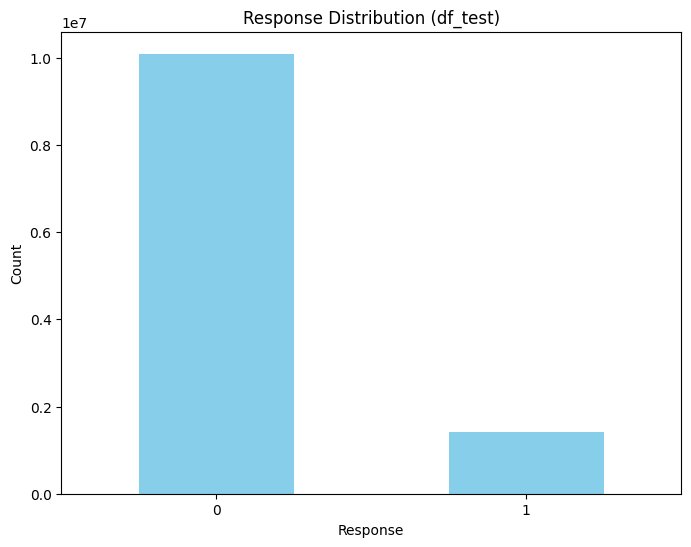

In [19]:
get_graph('Response', df_train)

## Gender

In [20]:
get_data_unique('Gender')

トレーニングデータ
['Male' 'Female']
データ数：2個

テストデータ
['Female' 'Male']
データ数：2個


In [21]:
print((df_train['Gender'] == 'Male').sum())
print((df_train['Gender'] == 'Female').sum())

6228134
5276664


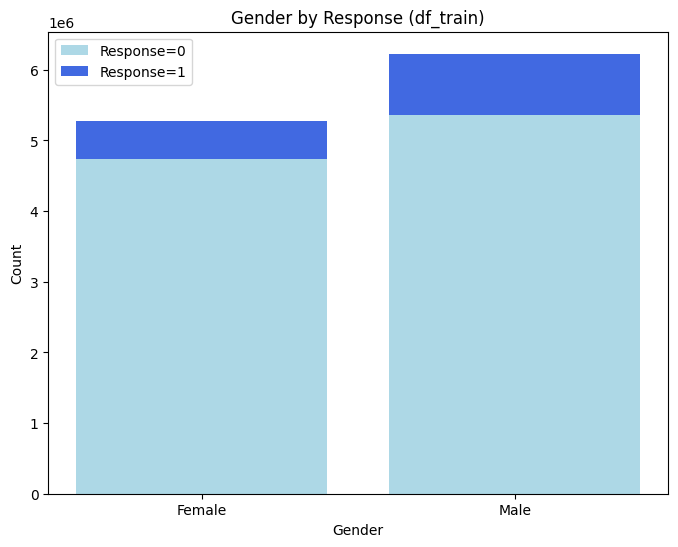

In [22]:
get_train_graph('Gender')

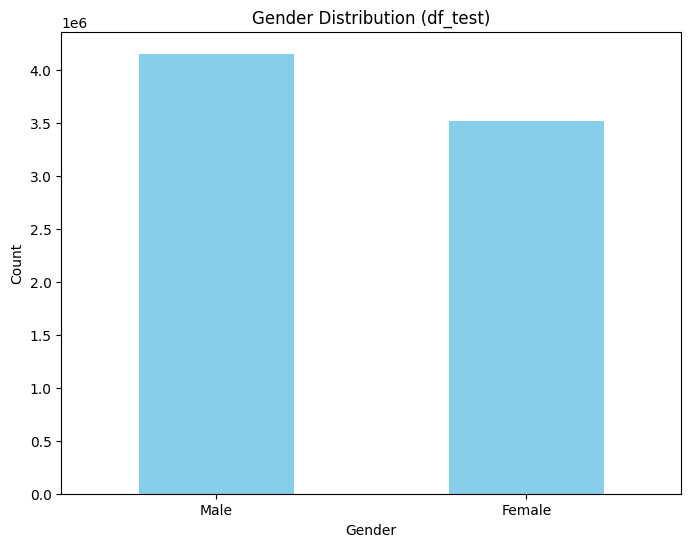

In [23]:
get_graph('Gender', df_test)

In [24]:
#ラベルエンコーディング
def transform_df(df):
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
    return df

transform_df(df_train)
transform_df(df_test)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,1,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,0,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,0,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,1,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,0,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148
...,...,...,...,...,...,...,...,...,...,...,...
7669861,19174659,0,57,1,28.0,0,1-2 Year,Yes,51661.0,124.0,109
7669862,19174660,0,28,1,50.0,1,< 1 Year,No,25651.0,152.0,184
7669863,19174661,0,47,1,33.0,1,1-2 Year,No,2630.0,138.0,63
7669864,19174662,0,30,1,28.0,0,< 1 Year,Yes,38866.0,124.0,119


In [25]:
df_train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,0,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,0,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,1,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,1,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,1,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11504793,11504793,0,48,1,6.0,0,1-2 Year,Yes,27412.0,26.0,218,0
11504794,11504794,1,26,1,36.0,0,< 1 Year,Yes,29509.0,152.0,115,1
11504795,11504795,1,29,1,32.0,1,< 1 Year,No,2630.0,152.0,189,0
11504796,11504796,1,51,1,28.0,0,1-2 Year,Yes,48443.0,26.0,274,1


In [26]:
df_test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,1,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,0,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,0,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,1,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,0,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148
...,...,...,...,...,...,...,...,...,...,...,...
7669861,19174659,0,57,1,28.0,0,1-2 Year,Yes,51661.0,124.0,109
7669862,19174660,0,28,1,50.0,1,< 1 Year,No,25651.0,152.0,184
7669863,19174661,0,47,1,33.0,1,1-2 Year,No,2630.0,138.0,63
7669864,19174662,0,30,1,28.0,0,< 1 Year,Yes,38866.0,124.0,119


In [27]:
#ワンホットエンコーディング
'''
def transform_enc_sex(df):
    df_onehot = pd.get_dummies(df.Gender)
    df = pd.concat([df, df_onehot], axis=1)
    df = df.drop('Gender', axis=1)
    return df

df_train = transform_enc_sex(df_train)
df_test = transform_enc_sex(df_test)
'''

"\ndef transform_enc_sex(df):\n    df_onehot = pd.get_dummies(df.Gender)\n    df = pd.concat([df, df_onehot], axis=1)\n    df = df.drop('Gender', axis=1)\n    return df\n\ndf_train = transform_enc_sex(df_train)\ndf_test = transform_enc_sex(df_test)\n"

## Age

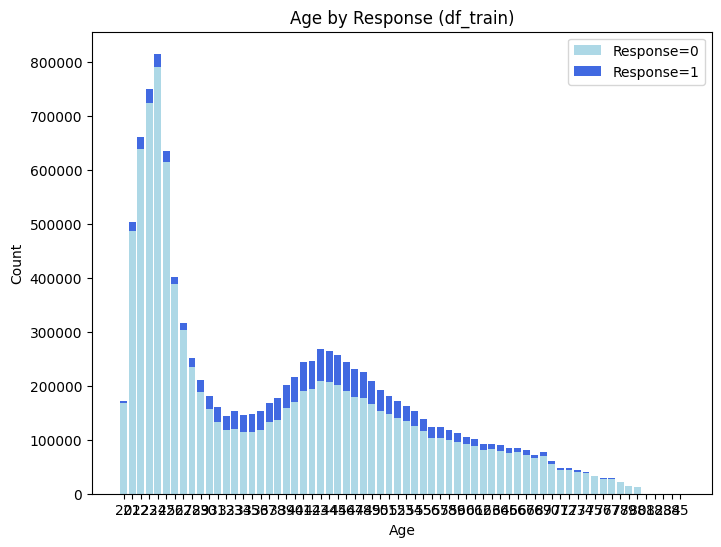

In [28]:
get_train_graph('Age')


<Axes: xlabel='Age'>

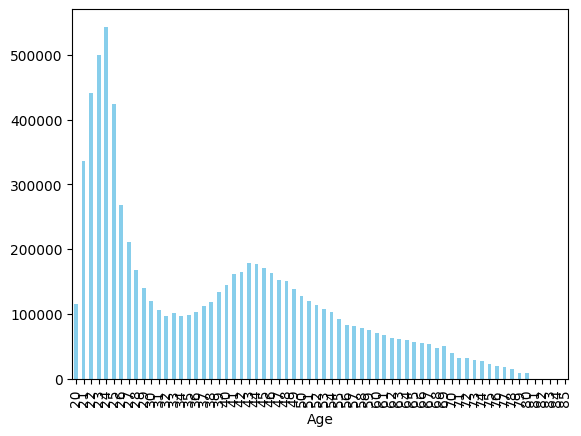

In [29]:
df_test['Age'].value_counts().sort_index().plot(kind='bar', color='skyblue')

In [30]:
pd.set_option('display.float_format', '{:.2f}'.format)
print('トレインデータ:年齢の基本統計量')
print(df_train['Age'].describe())
print()
print('テストデータ:年齢の基本統計量')
print(df_test['Age'].describe())

トレインデータ:年齢の基本統計量
count   11504798.00
mean          38.38
std           14.99
min           20.00
25%           24.00
50%           36.00
75%           49.00
max           85.00
Name: Age, dtype: float64

テストデータ:年齢の基本統計量
count   7669866.00
mean         38.39
std          15.00
min          20.00
25%          24.00
50%          36.00
75%          49.00
max          85.00
Name: Age, dtype: float64


In [31]:
def enco_age(df):
    cut_Age = pd.cut(df['Age'], 6)
    df['Age'] = LabelEncoder().fit_transform(cut_Age)

enco_age(df_train)
enco_age(df_test)

In [32]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,0,0,1,35.00,0,1-2 Year,Yes,65101.00,124.00,187,0
1,1,0,2,1,28.00,0,> 2 Years,Yes,58911.00,26.00,288,1
2,2,1,0,1,14.00,1,< 1 Year,No,38043.00,152.00,254,0
3,3,1,1,1,1.00,0,1-2 Year,Yes,2630.00,156.00,76,0
4,4,1,1,1,15.00,1,1-2 Year,No,31951.00,152.00,294,0


In [33]:
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,1,0,1,47.00,0,< 1 Year,No,2630.00,160.00,228
1,11504799,0,2,1,28.00,0,1-2 Year,Yes,37483.00,124.00,123
2,11504800,0,2,1,43.00,0,1-2 Year,Yes,2630.00,26.00,271
3,11504801,1,0,1,47.00,1,< 1 Year,No,24502.00,152.00,115
4,11504802,0,2,1,19.00,0,1-2 Year,No,34115.00,124.00,148


<Axes: xlabel='Age'>

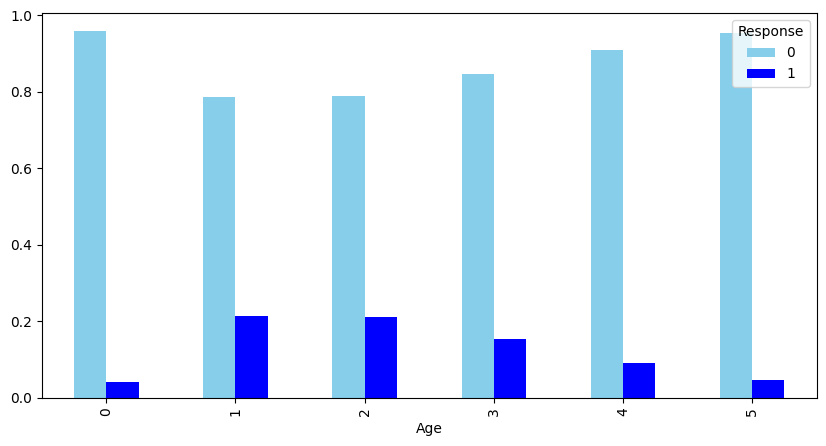

In [34]:
#pandasからグラフ表示（割合）
cross_Age = pd.crosstab(df_train["Age"], df_train["Response"], normalize='index')
cross_Age.plot.bar(figsize=(10, 5), color=['skyblue', 'blue'])

## Driving_License

In [35]:
get_data_unique('Driving_License')

トレーニングデータ
[1 0]
データ数：2個

テストデータ
[1 0]
データ数：2個


In [36]:
print(df_train[df_train['Driving_License'] == 0].shape[0])
print(df_train[df_train['Driving_License'] == 1].shape[0])

22757
11482041


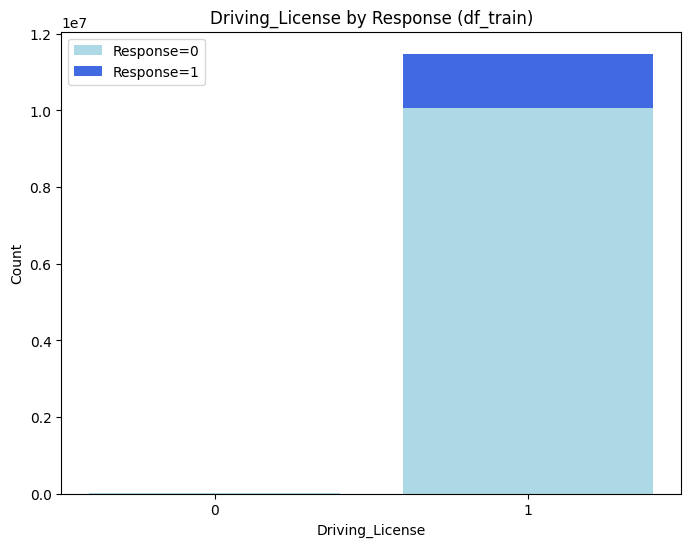

In [37]:
get_train_graph('Driving_License')

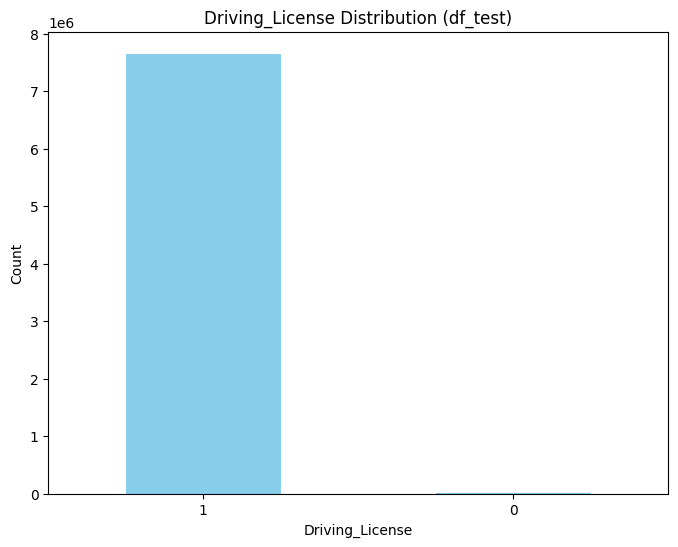

In [38]:
get_graph('Driving_License', df_test)

In [39]:
'''# Driving_Licenseが0のデータをフィルタリング
license_response_counts_0 = license_response_counts.loc[0]

# 棒グラフを作成
plt.figure(figsize=(8, 6))

# Response=0のバーを描画
plt.bar('0', license_response_counts_0[0], color='lightblue', label='Response=0')

# Response=1のバーを描画
plt.bar('0', license_response_counts_0[1], bottom=license_response_counts_0[0], color='royalblue', label='Response=1')

# グラフのタイトルとラベルを設定
plt.title('Driving_License=0 Distribution by Response')
plt.xlabel('Driving_License')
plt.xticks(ticks=[0], labels=['0'])  # X軸のラベルを設定
plt.ylabel('Count')

# 凡例を追加
plt.legend()

# グラフを表示
plt.show()
'''

"# Driving_Licenseが0のデータをフィルタリング\nlicense_response_counts_0 = license_response_counts.loc[0]\n\n# 棒グラフを作成\nplt.figure(figsize=(8, 6))\n\n# Response=0のバーを描画\nplt.bar('0', license_response_counts_0[0], color='lightblue', label='Response=0')\n\n# Response=1のバーを描画\nplt.bar('0', license_response_counts_0[1], bottom=license_response_counts_0[0], color='royalblue', label='Response=1')\n\n# グラフのタイトルとラベルを設定\nplt.title('Driving_License=0 Distribution by Response')\nplt.xlabel('Driving_License')\nplt.xticks(ticks=[0], labels=['0'])  # X軸のラベルを設定\nplt.ylabel('Count')\n\n# 凡例を追加\nplt.legend()\n\n# グラフを表示\nplt.show()\n"

## Region_Code
* 地域コード

In [40]:
region_code_train = df_train['Region_Code'].unique()
region_code_test = df_test['Region_Code'].unique()
print('トレインデータ　地域コード')
print(region_code_train)
print()
print('テストデータ　地域コード')
print(region_code_test)

トレインデータ　地域コード
[35.  28.  14.   1.  15.  47.  45.   8.  11.   3.  10.  12.  37.  50.
 30.  46.  29.  16.  26.  25.  41.  48.   7.   4.  24.  36.  33.   2.
  9.  27.  18.  43.  49.  17.  13.  38.   6.  21.  23.   0.  19.   5.
 39.  44.  20.  40.  22.  32.  42.  31.  34.  51.  52.  39.2]

テストデータ　地域コード
[47. 28. 43. 19. 30. 20. 37. 48. 29. 11. 21. 10.  0. 36. 41. 45. 35.  8.
 40. 39. 32. 34.  2.  6. 31. 49.  9. 46. 14. 18. 12. 15.  3.  4. 50. 22.
  7. 17. 33. 25. 24. 16. 27.  5. 13. 38. 23. 44. 26.  1. 42. 51. 52.]


In [41]:
print('トレインデータ　地域コード')
print(len(region_code_train))
print()
print('テストデータ　地域コード')
print(len(region_code_test))

トレインデータ　地域コード
54

テストデータ　地域コード
53


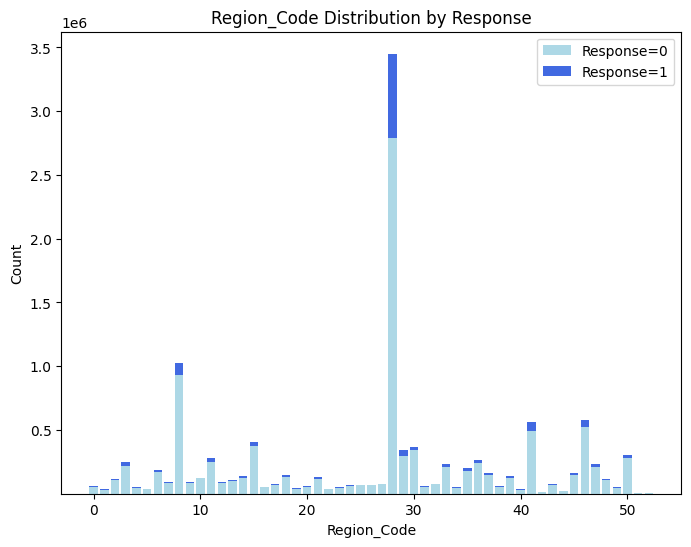

In [42]:
# Responseごとに指定されたカラムの値をカウントする
Region_Code_response_counts = df_train.groupby(['Region_Code', 'Response']).size().unstack(fill_value=0)

# 棒グラフを作成
plt.figure(figsize=(8, 6))

# Response=0のバーを描画
plt.bar(Region_Code_response_counts.index, Region_Code_response_counts[0], color='lightblue', label='Response=0')

 # Response=1のバーを描画
plt.bar(Region_Code_response_counts.index, Region_Code_response_counts[1], bottom=Region_Code_response_counts[0], color='royalblue', label='Response=1')

    # グラフのタイトルとラベルを設定
plt.title('Region_Code Distribution by Response')
plt.xlabel('Region_Code')
plt.xticks(rotation=0)
plt.ylabel('Count')    # 凡例を追加
plt.legend()

    # グラフを表示
plt.show()

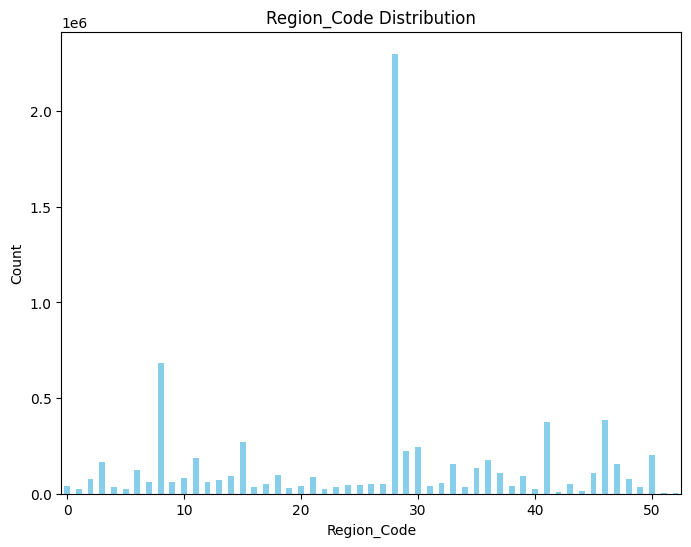

In [43]:
# Region_Codeの値をカウントし、インデックスをソートして棒グラフを描画
region_counts = df_test['Region_Code'].value_counts().sort_index()

# 棒グラフを作成
plt.figure(figsize=(8, 6))
region_counts.plot(kind='bar', color='skyblue')

# X軸のラベルを10毎に設定
ticks = range(0, len(region_counts), 10)
labels = region_counts.index[ticks].astype(int)

plt.xticks(ticks=ticks, labels=labels, rotation=0)

# グラフのタイトルとラベルを設定
plt.title('Region_Code Distribution')
plt.xlabel('Region_Code')
plt.ylabel('Count')

# グラフを表示
plt.show()


## Previously_Insured
* 以前に被保険者であったかどうか。

In [44]:
df_train['Previously_Insured'].unique()

array([0, 1], dtype=int64)

In [45]:
print(df_train[df_train['Previously_Insured'] == 0].shape[0])
print(df_train[df_train['Previously_Insured'] == 1].shape[0])

6178116
5326682


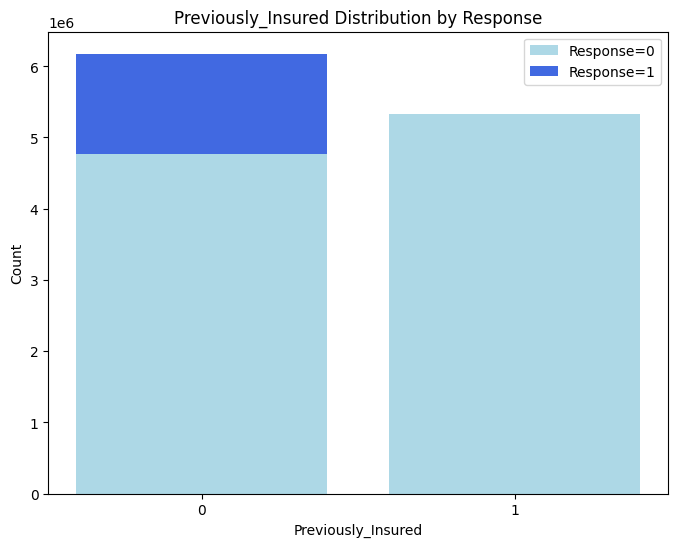

In [46]:
Previously_Insured_response_counts = df_train.groupby(['Previously_Insured', 'Response']).size().unstack(fill_value=0)

# 棒グラフを作成
plt.figure(figsize=(8, 6))

# Response=0のバーを描画
plt.bar(Previously_Insured_response_counts.index.astype(str), Previously_Insured_response_counts[0], color='lightblue', label='Response=0')

# Response=1のバーを描画
plt.bar(Previously_Insured_response_counts.index.astype(str), Previously_Insured_response_counts[1], bottom=Previously_Insured_response_counts[0], color='royalblue', label='Response=1')

# グラフのタイトルとラベルを設定
plt.title('Previously_Insured Distribution by Response')
plt.xlabel('Previously_Insured')
plt.xticks(ticks=Previously_Insured_response_counts.index, rotation=0, labels=['0', '1'])  # X軸のラベルを設定
plt.ylabel('Count')

# 凡例を追加
plt.legend()

# グラフを表示
plt.show()

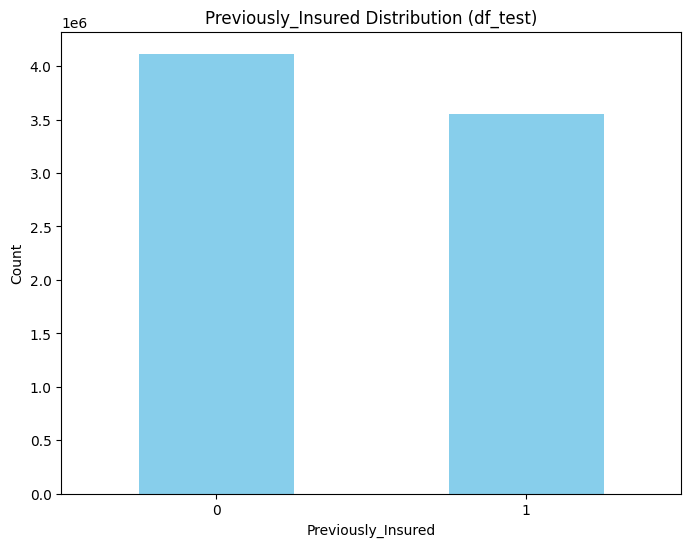

In [47]:
get_graph('Previously_Insured', df_test)

## Vehicle_Age
* 車の使用年数と思われる。

In [48]:
print(df_train['Vehicle_Age'].unique())
print(df_test['Vehicle_Age'].unique())

['1-2 Year' '> 2 Years' '< 1 Year']
['< 1 Year' '1-2 Year' '> 2 Years']


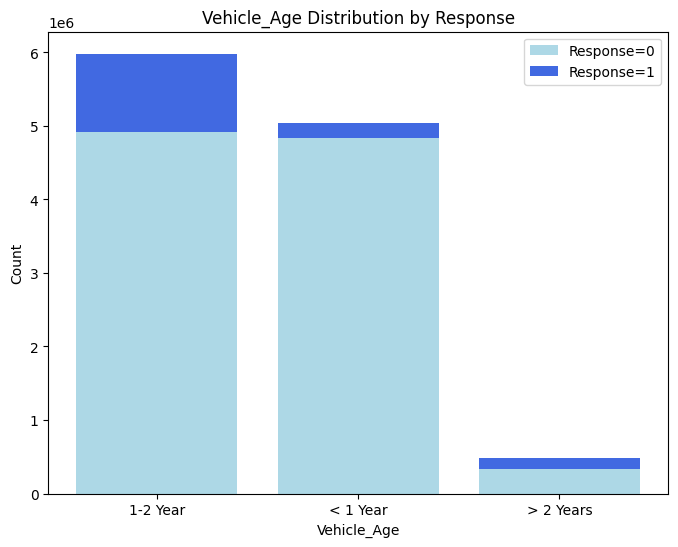

In [49]:
# Responseごとに指定されたカラムの値をカウントする
Vehicle_Age_response_counts = df_train.groupby(['Vehicle_Age', 'Response']).size().unstack(fill_value=0)

# 棒グラフを作成
plt.figure(figsize=(8, 6))

# Response=0のバーを描画
plt.bar(Vehicle_Age_response_counts.index, Vehicle_Age_response_counts[0], color='lightblue', label='Response=0')

 # Response=1のバーを描画
plt.bar(Vehicle_Age_response_counts.index, Vehicle_Age_response_counts[1], bottom=Vehicle_Age_response_counts[0], color='royalblue', label='Response=1')

    # グラフのタイトルとラベルを設定
plt.title('Vehicle_Age Distribution by Response')
plt.xlabel('Vehicle_Age')
plt.xticks(rotation=0)
plt.ylabel('Count')    # 凡例を追加
plt.legend()

    # グラフを表示
plt.show()

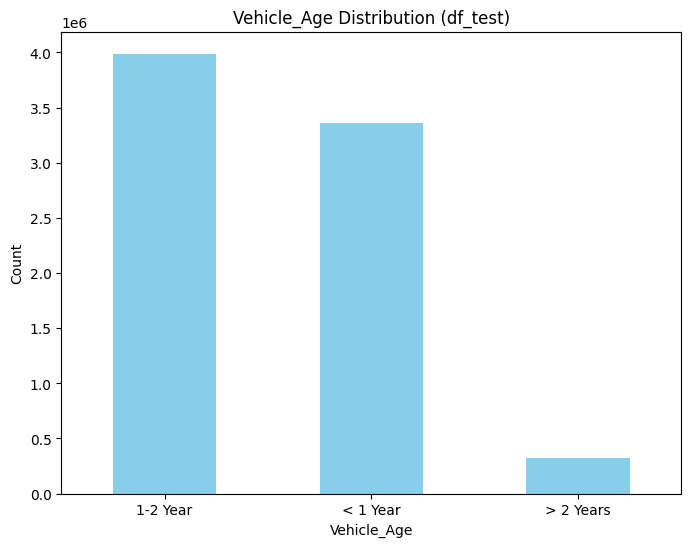

In [50]:
get_graph('Vehicle_Age', df_test)

['< 1 Year' '1-2 Year' '> 2 Years']

In [51]:
#ラベルエンコーディング
def transform_age(df):
    df['Vehicle_Age'] = df['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years':2})
    return df

df_train = transform_age(df_train)
df_test = transform_age(df_test)

In [52]:
df_train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,0,0,1,35.00,0,1,Yes,65101.00,124.00,187,0
1,1,0,2,1,28.00,0,2,Yes,58911.00,26.00,288,1
2,2,1,0,1,14.00,1,0,No,38043.00,152.00,254,0
3,3,1,1,1,1.00,0,1,Yes,2630.00,156.00,76,0
4,4,1,1,1,15.00,1,1,No,31951.00,152.00,294,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11504793,11504793,0,2,1,6.00,0,1,Yes,27412.00,26.00,218,0
11504794,11504794,1,0,1,36.00,0,0,Yes,29509.00,152.00,115,1
11504795,11504795,1,0,1,32.00,1,0,No,2630.00,152.00,189,0
11504796,11504796,1,2,1,28.00,0,1,Yes,48443.00,26.00,274,1


In [53]:
df_test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,1,0,1,47.00,0,0,No,2630.00,160.00,228
1,11504799,0,2,1,28.00,0,1,Yes,37483.00,124.00,123
2,11504800,0,2,1,43.00,0,1,Yes,2630.00,26.00,271
3,11504801,1,0,1,47.00,1,0,No,24502.00,152.00,115
4,11504802,0,2,1,19.00,0,1,No,34115.00,124.00,148
...,...,...,...,...,...,...,...,...,...,...,...
7669861,19174659,0,3,1,28.00,0,1,Yes,51661.00,124.00,109
7669862,19174660,0,0,1,50.00,1,0,No,25651.00,152.00,184
7669863,19174661,0,2,1,33.00,1,1,No,2630.00,138.00,63
7669864,19174662,0,0,1,28.00,0,0,Yes,38866.00,124.00,119


In [54]:
#ワンホットエンコーディング
'''
def transform_onehotenc_vehicle(df):
    df_onehot = pd.get_dummies(df.Vehicle_Age)
    df = pd.concat([df, df_onehot], axis=1)
    df = df.drop('Vehicle_Age', axis=1)
    return df

df_train = transform_onehotenc_vehicle(df_train)
df_test = transform_onehotenc_vehicle(df_test)
'''

"\ndef transform_onehotenc_vehicle(df):\n    df_onehot = pd.get_dummies(df.Vehicle_Age)\n    df = pd.concat([df, df_onehot], axis=1)\n    df = df.drop('Vehicle_Age', axis=1)\n    return df\n\ndf_train = transform_onehotenc_vehicle(df_train)\ndf_test = transform_onehotenc_vehicle(df_test)\n"

## Vehicle_Damage
* 車両損傷

In [55]:
print(df_train['Vehicle_Damage'].unique())
print(df_test['Vehicle_Damage'].unique())

['Yes' 'No']
['No' 'Yes']


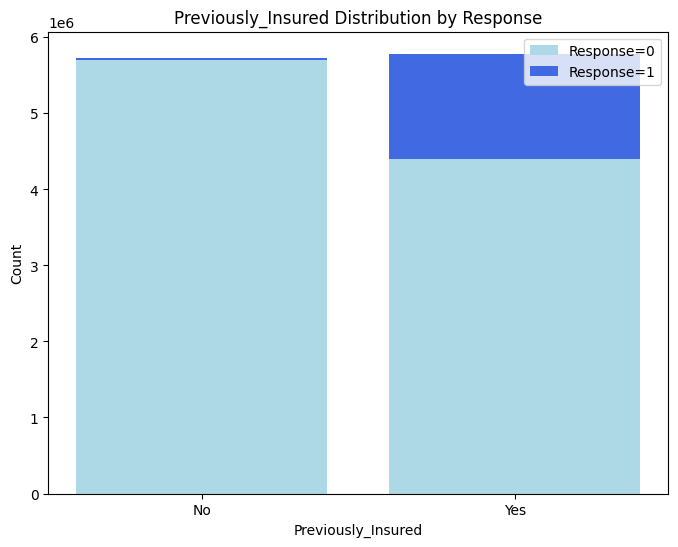

In [56]:
Vehicle_Damage_response_counts = df_train.groupby(['Vehicle_Damage', 'Response']).size().unstack(fill_value=0)

# 棒グラフを作成
plt.figure(figsize=(8, 6))

# Response=0のバーを描画
plt.bar(Vehicle_Damage_response_counts.index.astype(str), Vehicle_Damage_response_counts[0], color='lightblue', label='Response=0')

# Response=1のバーを描画
plt.bar(Vehicle_Damage_response_counts.index.astype(str), Vehicle_Damage_response_counts[1], bottom=Vehicle_Damage_response_counts[0], color='royalblue', label='Response=1')

# グラフのタイトルとラベルを設定
plt.title('Previously_Insured Distribution by Response')
plt.xlabel('Previously_Insured')
plt.xticks(ticks=Vehicle_Damage_response_counts.index, rotation=0)  # X軸のラベルを設定
plt.ylabel('Count')

# 凡例を追加
plt.legend()

# グラフを表示
plt.show()

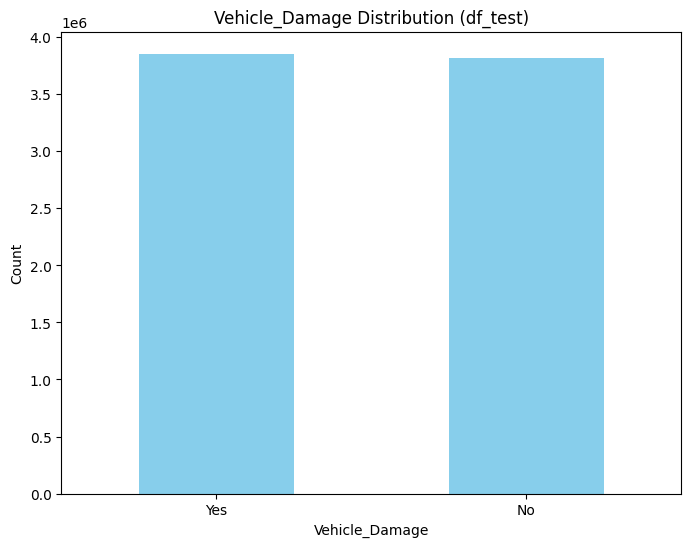

In [57]:
get_graph('Vehicle_Damage', df_test)

In [58]:
#ラベルエンコーディング
def transform_df(df):
    df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'No': 0, 'Yes': 1})
    return df

df_train = transform_df(df_train)
df_test = transform_df(df_test)

In [59]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,0,0,1,35.00,0,1,1,65101.00,124.00,187,0
1,1,0,2,1,28.00,0,2,1,58911.00,26.00,288,1
2,2,1,0,1,14.00,1,0,0,38043.00,152.00,254,0
3,3,1,1,1,1.00,0,1,1,2630.00,156.00,76,0
4,4,1,1,1,15.00,1,1,0,31951.00,152.00,294,0


In [60]:
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,1,0,1,47.00,0,0,0,2630.00,160.00,228
1,11504799,0,2,1,28.00,0,1,1,37483.00,124.00,123
2,11504800,0,2,1,43.00,0,1,1,2630.00,26.00,271
3,11504801,1,0,1,47.00,1,0,0,24502.00,152.00,115
4,11504802,0,2,1,19.00,0,1,0,34115.00,124.00,148


## Annual_Premium
* 年間プレミアム……？

In [61]:
Annual_Premium = df_train['Annual_Premium']

In [62]:
Annual_Premium.unique()

array([65101., 58911., 38043., ..., 22112., 54335., 64538.])

In [63]:
len(Annual_Premium.unique())

51728

In [64]:
Annual_Premium.describe()

count   11504798.00
mean       30461.37
std        16454.75
min         2630.00
25%        25277.00
50%        31824.00
75%        39451.00
max       540165.00
Name: Annual_Premium, dtype: float64

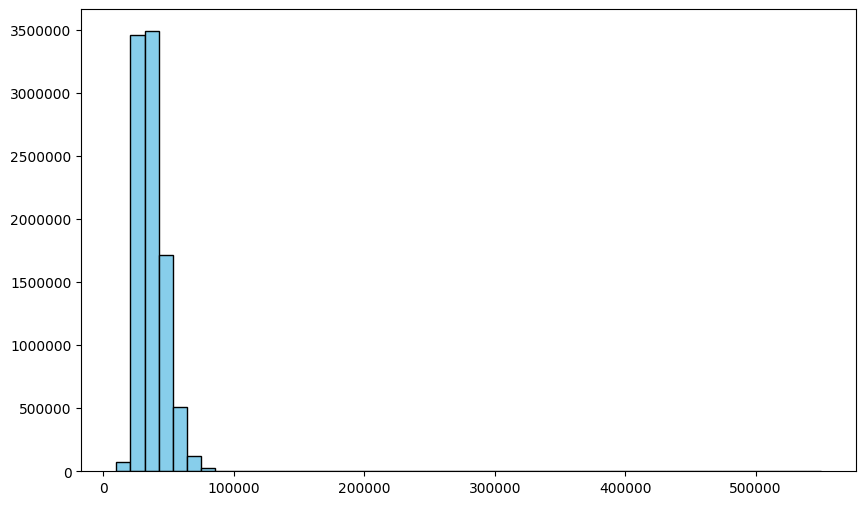

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(df_train['Annual_Premium'], bins=50, range=(10000, 550000), color='skyblue', edgecolor='black')
plt.ticklabel_format(style='plain', axis='y')

# グラフを変数に格納する例
histogram_data = {
    'histogram': hist,
    'bins': bins
}


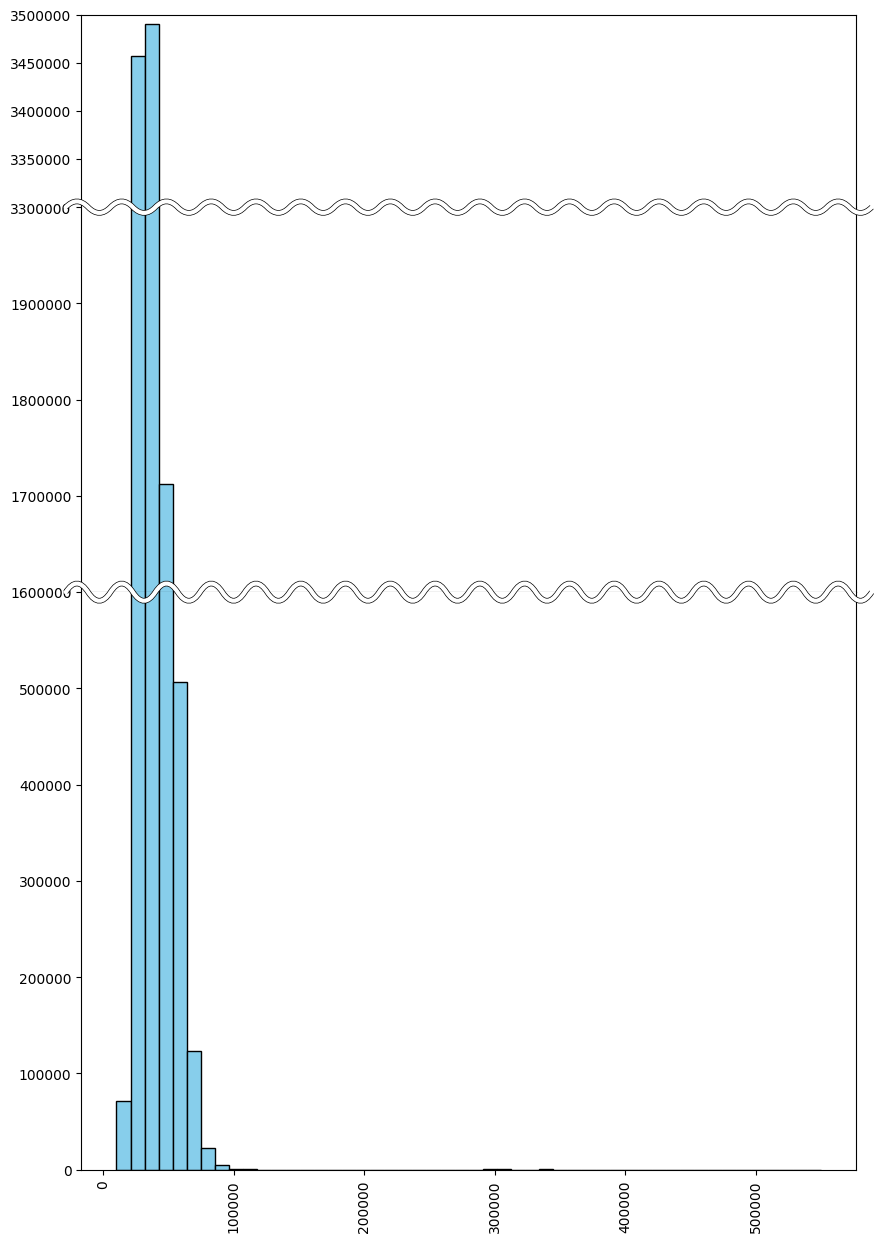

In [66]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.path import Path
import matplotlib.patches as mpatches

# APにデータを格納
AP = df_train['Annual_Premium']

# 新しい図を作成
fig, ax = plt.subplots(nrows=3, gridspec_kw={'height_ratios':(1,2,3)}, figsize=(10, 15))

upper_row = 3300000, 3500000
middle_row = 1600000, 2000000
lower_row = 0, 600000


# 上段のプロット
ax[0].hist(AP, bins=50, range=(10000, 550000), color='skyblue', edgecolor='black')
ax[0].set_ylim(upper_row)  # y軸の範囲を設定
ax[0].spines['bottom'].set_visible(False)  # 下側の枠線を非表示にする
ax[0].tick_params(axis='x', which='both', bottom=False, labelbottom=False)  # x軸の目盛りを非表示にする

# 中段のプロット
ax[1].hist(AP, bins=50, range=(10000, 550000), color='skyblue', edgecolor='black')
ax[1].set_ylim(middle_row)  # y軸の範囲を設定
ax[1].set_yticks([1600000, 1700000, 1800000, 1900000])  # y軸の目盛りを設定
ax[1].spines['top'].set_visible(False)  # 上側の枠線を非表示にする

# 下段のプロット
ax[2].hist(AP, bins=50, range=(10000, 550000), color='skyblue', edgecolor='black')
ax[2].set_ylim(lower_row)  # y軸の範囲を設定
ax[2].set_yticks([0, 100000, 200000, 300000, 400000, 500000])  # y軸の目盛りを設定
ax[2].spines['top'].set_visible(False)  # 上側の枠線を非表示にする

# サブプロット間の上下間隔をゼロに設定
fig.subplots_adjust(hspace=0.0)

## ニョロ線の描画
d1 = 0.02 # X軸のはみだし量
d2 = 0.03 # ニョロ波の高さ
wn = 73   # ニョロ波の数（奇数値を指定）

pp = (0,d2,0,-d2)
px = np.linspace(-d1,1+d1,wn)
py = np.array([1+pp[i%4] for i in range(0,wn)])
p = Path(list(zip(px,py)), [Path.MOVETO]+[Path.CURVE3]*(wn-1))

line1 = mpatches.PathPatch(p, lw=4, edgecolor='black',
                          facecolor='None', clip_on=False,
                          transform=ax[1].transAxes, zorder=10)

line2 = mpatches.PathPatch(p,lw=3, edgecolor='white',
                           facecolor='None', clip_on=False,
                           transform=ax[1].transAxes, zorder=10,
                           capstyle='round')

line3 = mpatches.PathPatch(p, lw=4, edgecolor='black',
                          facecolor='None', clip_on=False,
                          transform=ax[2].transAxes, zorder=10)

line4 = mpatches.PathPatch(p,lw=3, edgecolor='white',
                           facecolor='None', clip_on=False,
                           transform=ax[2].transAxes, zorder=10,
                           capstyle='round')

a = ax[1].add_patch(line1)
a = ax[1].add_patch(line2)

a = ax[2].add_patch(line3)
a = ax[2].add_patch(line4)

for axes in ax:
    axes.ticklabel_format(style='plain', axis='y')

plt.xticks(rotation=90)
plt.show()

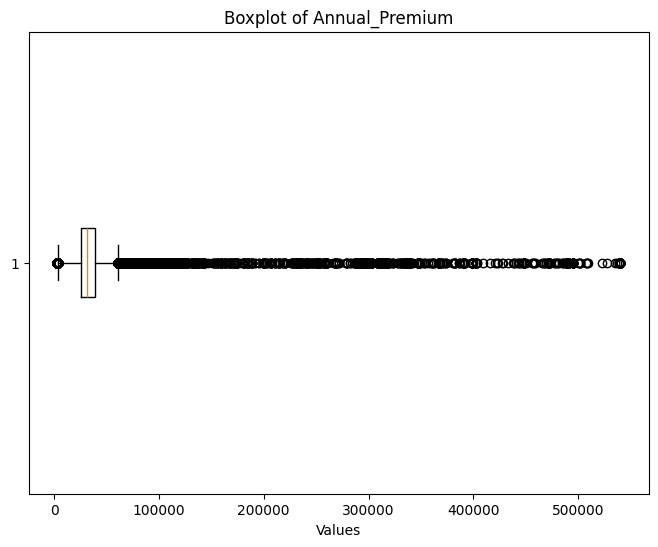

In [67]:
import matplotlib.pyplot as plt

# データフレームのあるカラム（例えば 'Annual_Premium'）を選択
data_column = 'Annual_Premium'

# 箱ひげ図の描画
plt.figure(figsize=(8, 6))
plt.boxplot(df_train[data_column], vert=False)  # vert=Falseで横向きの箱ひげ図を描画
plt.title('Boxplot of {}'.format(data_column))
plt.xlabel('Values')
plt.show()


In [68]:
import pandas as pd

# データフレームのカラムから数値データを取得
data_AP = df_train['Annual_Premium']

# 四分位数を計算
Q1 = data_AP.quantile(0.25)
Q3 = data_AP.quantile(0.75)

# IQRを計算
IQR = Q3 - Q1

# 外れ値の閾値を計算
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# 外れ値を抽出
outliers = data_AP[(data_AP < lower_threshold) | (data_AP > upper_threshold)]

print("外れ値の数:", len(outliers))
print("外れ値の最小値:", outliers.min())
print("外れ値の最大値:", outliers.max())


外れ値の数: 2377273
外れ値の最小値: 2630.0
外れ値の最大値: 540165.0


In [69]:
len(data_AP)

11504798

In [70]:
len(data_AP)-len(outliers)

9127525

In [71]:
# データフレームのコピーを作成（元のデータを保持するため）
df_cleaned = df_train.copy()

# 外れ値を除去したいカラムを指定
column_name = 'Annual_Premium'

# 四分位数を計算
Q1 = df_cleaned[column_name].quantile(0.25)
Q3 = df_cleaned[column_name].quantile(0.75)

# IQRを計算
IQR = Q3 - Q1

# 外れ値の閾値を計算
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# 外れ値を持つ行を除去
df_cleaned = df_cleaned[(df_cleaned[column_name] >= lower_threshold) & (df_cleaned[column_name] <= upper_threshold)]

# 除去前後の行数を表示
print("除去前の行数:", len(df_train))
print("除去後の行数:", len(df_cleaned))


除去前の行数: 11504798
除去後の行数: 9127525


In [72]:
df_cleaned['Annual_Premium'].describe()

count   9127525.00
mean      35785.30
std        8732.91
min        4021.00
25%       29076.00
50%       34180.00
75%       40783.00
max       60711.00
Name: Annual_Premium, dtype: float64

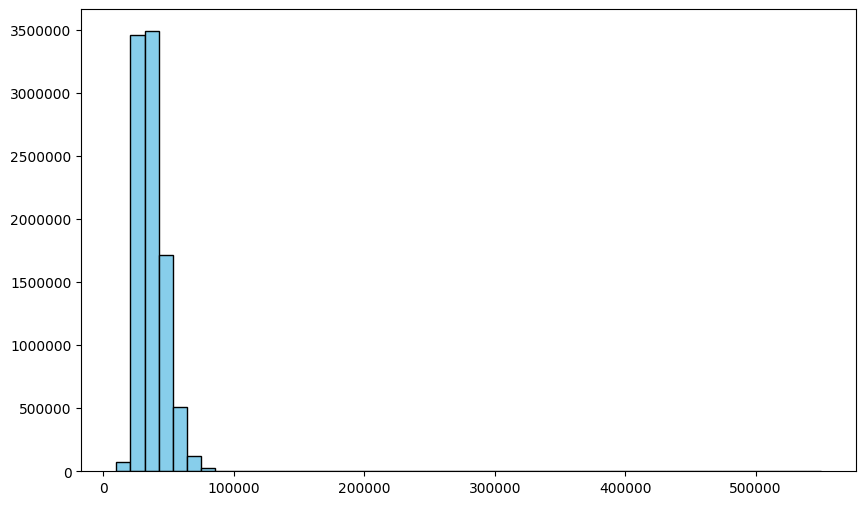

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(df_train['Annual_Premium'], bins=50, range=(10000, 550000), color='skyblue', edgecolor='black')
plt.ticklabel_format(style='plain', axis='y')

In [74]:
df_test.describe()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
count,7669866.00,7669866.00,7669866.00,7669866.00,7669866.00,7669866.00,7669866.00,7669866.00,7669866.00,7669866.00,7669866.00
mean,15339730.50,0.46,1.26,1.00,26.43,0.46,0.60,0.50,30465.53,112.36,163.90
std,2214099.74,0.50,1.34,0.04,12.99,0.50,0.57,0.50,16445.86,54.07,79.98
min,11504798.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2630.00,1.00,10.00
25%,13422264.25,0.00,0.00,1.00,15.00,0.00,0.00,0.00,25280.00,29.00,99.00
50%,15339730.50,0.00,1.00,1.00,28.00,0.00,1.00,1.00,31827.00,151.00,166.00
75%,17257196.75,1.00,2.00,1.00,35.00,1.00,1.00,1.00,39460.00,152.00,232.00
max,19174663.00,1.00,5.00,1.00,52.00,1.00,2.00,1.00,540165.00,163.00,299.00


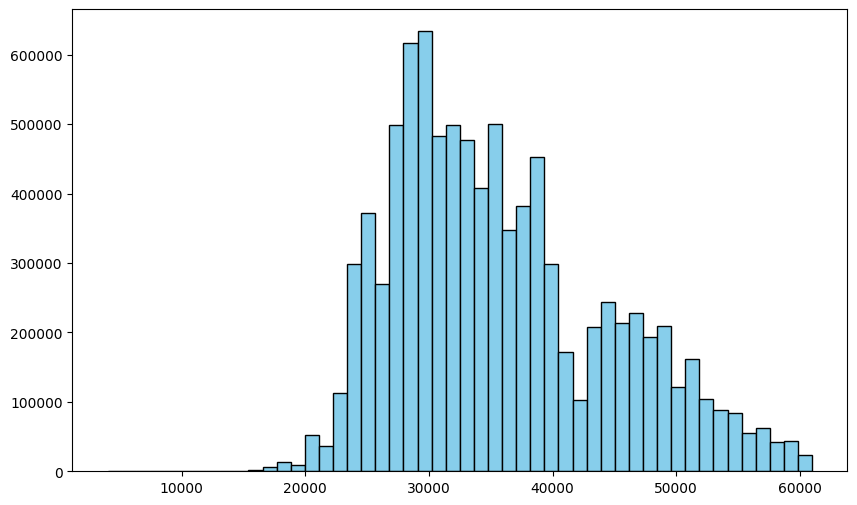

In [75]:
plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(df_cleaned['Annual_Premium'], bins=50, range=(4000, 61000), color='skyblue', edgecolor='black')
plt.ticklabel_format(style='plain', axis='y')

In [76]:
len(df_cleaned['Annual_Premium'].unique())

41607

In [77]:
'''from sklearn.preprocessing import LabelEncoder

# ラベルエンコーダのインスタンスを作成
label_encoder = LabelEncoder()

# Annual_Premium カラムをラベルエンコーディング
df_cleaned['Annual_Premium_LabelEncoded'] = label_encoder.fit_transform(df_cleaned['Annual_Premium'])

# ラベルエンコーディングした結果を表示
df_cleaned[['Annual_Premium', 'Annual_Premium_LabelEncoded']].head()'''


"from sklearn.preprocessing import LabelEncoder\n\n# ラベルエンコーダのインスタンスを作成\nlabel_encoder = LabelEncoder()\n\n# Annual_Premium カラムをラベルエンコーディング\ndf_cleaned['Annual_Premium_LabelEncoded'] = label_encoder.fit_transform(df_cleaned['Annual_Premium'])\n\n# ラベルエンコーディングした結果を表示\ndf_cleaned[['Annual_Premium', 'Annual_Premium_LabelEncoded']].head()"

In [78]:
'''import pandas as pd

# グルーピングしたいカラムとビンの定義
column_name = 'Annual_Premium'
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000]  # ビンの範囲を定義（必要に応じて調整）

# ビンに分割した結果を新しいカラムとして追加
df_cleaned['Premium_Group'] = pd.cut(df_cleaned[column_name], bins)

# ワンホットエンコーディング
dummies = pd.get_dummies(df_cleaned['Premium_Group'], prefix='Premium')

# 元のデータフレームにワンホットエンコーディングの結果を結合
df_cleaned = pd.concat([df_cleaned, dummies], axis=1)

# 不要なカラムを削除（オプション）
df_cleaned.drop(['Premium_Group'], axis=1, inplace=True)

# 結果を表示
df_cleaned.head()
'''

"import pandas as pd\n\n# グルーピングしたいカラムとビンの定義\ncolumn_name = 'Annual_Premium'\nbins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000]  # ビンの範囲を定義（必要に応じて調整）\n\n# ビンに分割した結果を新しいカラムとして追加\ndf_cleaned['Premium_Group'] = pd.cut(df_cleaned[column_name], bins)\n\n# ワンホットエンコーディング\ndummies = pd.get_dummies(df_cleaned['Premium_Group'], prefix='Premium')\n\n# 元のデータフレームにワンホットエンコーディングの結果を結合\ndf_cleaned = pd.concat([df_cleaned, dummies], axis=1)\n\n# 不要なカラムを削除（オプション）\ndf_cleaned.drop(['Premium_Group'], axis=1, inplace=True)\n\n# 結果を表示\ndf_cleaned.head()\n"

In [79]:
def enco_AP(df):
    # グルーピングしたいカラムとビンの定義
    column_name = 'Annual_Premium'
    bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, float('inf')]
    labels = ['0-10000', '10000-20000', '20000-30000', '30000-40000', 
              '40000-50000', '50000-60000', '60000-70000', '70000以上']
    # ビンに分割した結果を新しいカラムとして追加
    df['Premium_Group'] = pd.cut(df[column_name], bins, labels=False)
    # ラベルエンコーディング
    df['AP_LabelEncoded'] = df['Premium_Group']
    # 元のデータフレームにラベルエンコーディングの結果を結合（不要な場合は削除）
    df.drop(['Premium_Group'], axis=1, inplace=True)

enco_AP(df_cleaned)
enco_AP(df_test)

In [80]:
df_cleaned.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,AP_LabelEncoded
1,1,0,2,1,28.00,0,2,1,58911.00,26.00,288,1,5
2,2,1,0,1,14.00,1,0,0,38043.00,152.00,254,0,3
4,4,1,1,1,15.00,1,1,0,31951.00,152.00,294,0,3
5,5,1,1,1,47.00,1,0,0,28150.00,152.00,197,0,2
6,6,0,0,1,45.00,1,0,0,27128.00,152.00,190,0,2


In [81]:
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,AP_LabelEncoded
0,11504798,1,0,1,47.00,0,0,0,2630.00,160.00,228,0
1,11504799,0,2,1,28.00,0,1,1,37483.00,124.00,123,3
2,11504800,0,2,1,43.00,0,1,1,2630.00,26.00,271,0
3,11504801,1,0,1,47.00,1,0,0,24502.00,152.00,115,2
4,11504802,0,2,1,19.00,0,1,0,34115.00,124.00,148,3


In [82]:
print(df_cleaned['AP_LabelEncoded'].unique())
print(f'df_cleanのデータ数：{len(df_cleaned["AP_LabelEncoded"].unique())}')
print()
print(df_test['AP_LabelEncoded'].unique())
print(f'df_cleanのデータ数：{len(df_test["AP_LabelEncoded"].unique())}')

[5 3 2 4 1 6 0]
df_cleanのデータ数：7

[0 3 2 4 5 7 6 1]
df_cleanのデータ数：8


In [83]:
len(Annual_Premium.unique())

51728

In [84]:
'''Annual_Premium_response_counts = df_train.groupby(['Annual_Premium', 'Response']).size().unstack(fill_value=0)

# 棒グラフを作成
plt.figure(figsize=(8, 6))

# Response=0のバーを描画
plt.bar(Annual_Premium_response_counts.index.astype(str), Annual_Premium_response_counts[0], color='lightblue', label='Response=0')

# Response=1のバーを描画
plt.bar(Annual_Premium_response_counts.index.astype(str), Annual_Premium_response_counts[1], bottom=Annual_Premium_response_counts[0], color='royalblue', label='Response=1')

# グラフのタイトルとラベルを設定
plt.title('Previously_Insured Distribution by Response')
plt.xlabel('Previously_Insured')
plt.xticks(ticks=Annual_Premium_response_counts.index, rotation=0)  # X軸のラベルを設定
plt.ylabel('Count')

# 凡例を追加
plt.legend()

# グラフを表示
plt.show()'''

"Annual_Premium_response_counts = df_train.groupby(['Annual_Premium', 'Response']).size().unstack(fill_value=0)\n\n# 棒グラフを作成\nplt.figure(figsize=(8, 6))\n\n# Response=0のバーを描画\nplt.bar(Annual_Premium_response_counts.index.astype(str), Annual_Premium_response_counts[0], color='lightblue', label='Response=0')\n\n# Response=1のバーを描画\nplt.bar(Annual_Premium_response_counts.index.astype(str), Annual_Premium_response_counts[1], bottom=Annual_Premium_response_counts[0], color='royalblue', label='Response=1')\n\n# グラフのタイトルとラベルを設定\nplt.title('Previously_Insured Distribution by Response')\nplt.xlabel('Previously_Insured')\nplt.xticks(ticks=Annual_Premium_response_counts.index, rotation=0)  # X軸のラベルを設定\nplt.ylabel('Count')\n\n# 凡例を追加\nplt.legend()\n\n# グラフを表示\nplt.show()"

## Policy_Sales_Channel
* 保険会社が保険商品を販売するために利用する販売チャネルや手段を指す

In [85]:
get_data_unique('Policy_Sales_Channel')

トレーニングデータ
[124.  26. 152. 156. 160.   8.  31. 157.  60. 122.  15.  30. 147.   1.
  63. 136. 154.  18. 135. 151.   3.  10.  55. 108.   7.  29. 163.  13.
 133. 145.  25.  12. 109.  23.  78.   4. 153. 150. 146. 120. 107. 155.
  61.  14.  45.  11.  19.  24.  52. 132. 125.  59.  16.  22.  56.  20.
 148. 158. 159. 139.   9. 113. 121.  21. 111.  64. 116. 103. 128.  65.
  37.  91. 129. 127. 106. 140.  35. 131.  17.  93.  90.  36. 118.  54.
  62. 138.  42.  46.  86.  80.  68. 119.  94.  48.  47.  83.  97.  70.
  53.  44. 114.  98.  88. 110.  32. 126.  96.  99. 130.  66. 105.  51.
  38. 137.  89.  81.  92. 117.  73.  69.  49.  87.  33.  39.  50. 123.
  75. 101. 115. 100.  95.  57.  71. 134.  82.   6.  58. 104.  41.  40.
   2.  79.  34.  76.  28.  74.  43.  67.  27. 112. 102.   5.]
データ数：152個

テストデータ
[160. 124.  26. 152.  29.   1. 122. 156.  55.  25.  52.  21. 153.  24.
 151.   4.  60.  11. 163.  54.  31. 157. 154.  10.   7. 158.   3.  13.
  61. 129. 120. 107. 147. 130.   8.  91.  23.  15. 155.  2

In [86]:
len(df_cleaned['Policy_Sales_Channel'].unique())

150

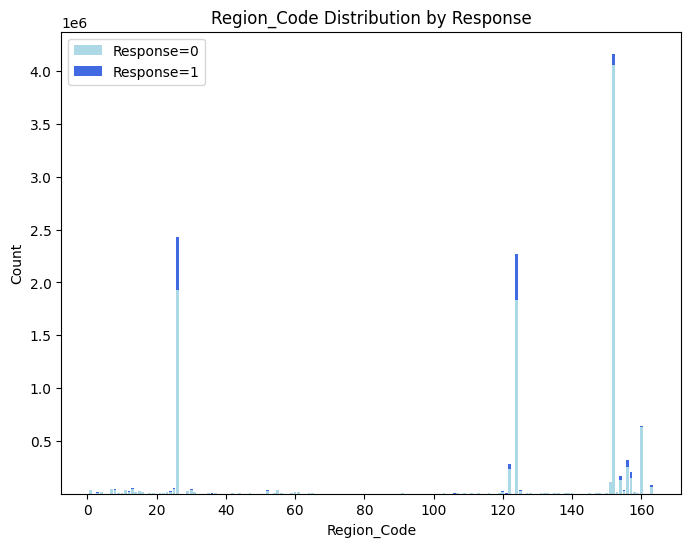

In [87]:
# Responseごとに指定されたカラムの値をカウントする
Policy_Sales_Channel_response_counts = df_train.groupby(['Policy_Sales_Channel', 'Response']).size().unstack(fill_value=0)

# 棒グラフを作成
plt.figure(figsize=(8, 6))

# Response=0のバーを描画
plt.bar(Policy_Sales_Channel_response_counts.index, Policy_Sales_Channel_response_counts[0], color='lightblue', label='Response=0')

 # Response=1のバーを描画
plt.bar(Policy_Sales_Channel_response_counts.index, Policy_Sales_Channel_response_counts[1], bottom=Policy_Sales_Channel_response_counts[0], color='royalblue', label='Response=1')

    # グラフのタイトルとラベルを設定
plt.title('Region_Code Distribution by Response')
plt.xlabel('Region_Code')
plt.xticks(rotation=0)
plt.ylabel('Count')    # 凡例を追加
plt.legend()

    # グラフを表示
plt.show()

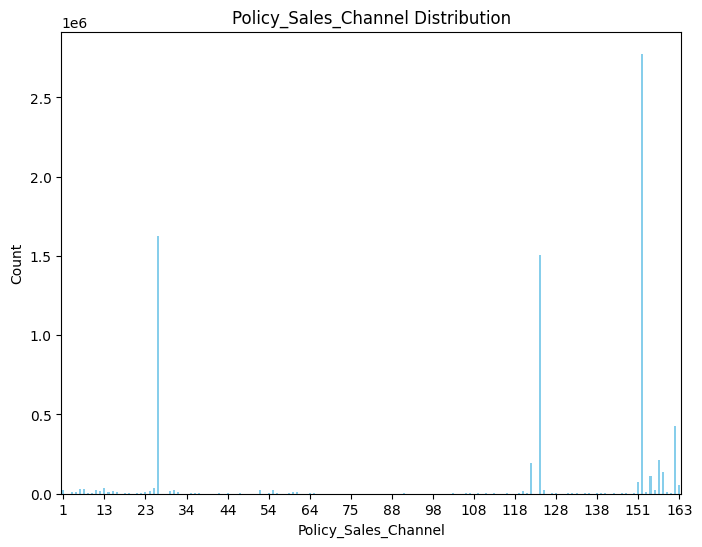

In [88]:
# Region_Codeの値をカウントし、インデックスをソートして棒グラフを描画
region_counts = df_test['Policy_Sales_Channel'].value_counts().sort_index()

# 棒グラフを作成
plt.figure(figsize=(8, 6))
region_counts.plot(kind='bar', color='skyblue')

# X軸のラベルを10毎に設定
ticks = range(0, len(region_counts), 10)
labels = region_counts.index[ticks].astype(int)

plt.xticks(ticks=ticks, labels=labels, rotation=0)

# グラフのタイトルとラベルを設定
plt.title('Policy_Sales_Channel Distribution')
plt.xlabel('Policy_Sales_Channel')
plt.ylabel('Count')

# グラフを表示
plt.show()


## Vintage
* 顧客が会社と関連付けられている日数。

In [89]:
df_cleaned['Vintage'].unique()


array([288, 254, 294, 197, 190, 262,  36, 215, 203, 259, 245, 240, 242,
       117, 151, 185, 264,  38, 152, 284,  25, 181, 275,  95, 260, 222,
       227, 273,  70, 160,  20, 168, 286, 130, 171, 113, 158, 208,  42,
        94, 228, 194, 249, 129, 150,  11, 120,  16, 226, 100, 230, 235,
        43, 132, 123, 131, 111, 127, 112, 267, 182, 101,  34,  80, 292,
        22, 163, 110,  29,  19,  77, 241, 232, 192, 280, 252, 281, 253,
       114,  74,  81,  17, 186,  61, 255,  21, 145,  27,  63, 268,  48,
       202, 274, 139, 246, 142,  78, 193, 137, 108,  56, 238, 165, 270,
       248, 237, 247, 205,  15, 218, 282,  24,  86,  75,  54, 278,  91,
        49, 105, 251,  53, 118, 138,  47, 116, 195,  71, 224,  67, 279,
       244, 206, 256, 200, 257, 172, 283, 166, 261,  26, 155, 285, 291,
       128,  65, 178,  79,  69,  40, 201, 198, 234, 187, 263, 141, 180,
        98, 219,  92, 231,  55, 161, 106, 119,  90, 199, 225, 126,  35,
       103,  13, 146, 149, 115,  23, 207, 157, 216, 188, 204, 17

In [90]:
len(df_cleaned['Vintage'].unique())

290

In [91]:
df_cleaned['Vintage'].describe()

count   9127525.00
mean        163.99
std          79.95
min          10.00
25%          99.00
50%         166.00
75%         232.00
max         299.00
Name: Vintage, dtype: float64

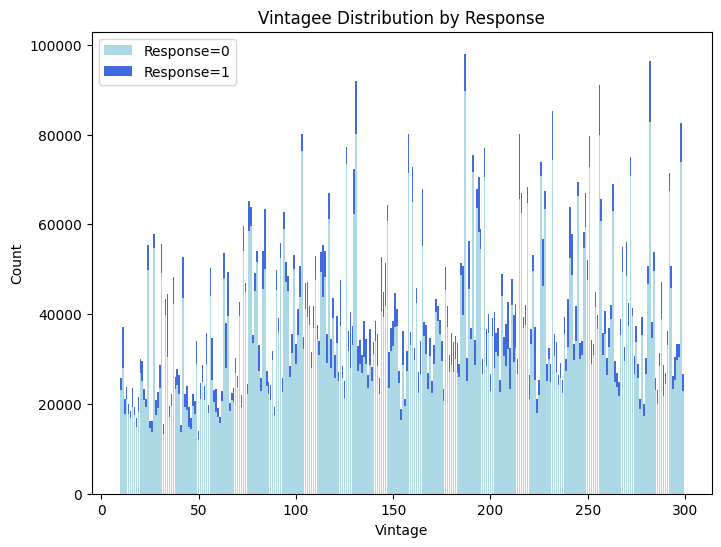

In [92]:
# Responseごとに指定されたカラムの値をカウントする
Vintage_response_counts = df_train.groupby(['Vintage', 'Response']).size().unstack(fill_value=0)

# 棒グラフを作成
plt.figure(figsize=(8, 6))

# Response=0のバーを描画
plt.bar(Vintage_response_counts.index, Vintage_response_counts[0], color='lightblue', label='Response=0')

 # Response=1のバーを描画
plt.bar(Vintage_response_counts.index, Vintage_response_counts[1], bottom=Vintage_response_counts[0], color='royalblue', label='Response=1')

    # グラフのタイトルとラベルを設定
plt.title('Vintagee Distribution by Response')
plt.xlabel('Vintage')
plt.xticks(rotation=0)
plt.ylabel('Count')    # 凡例を追加
plt.legend()

    # グラフを表示
plt.show()

In [93]:
def enco_Vintage(df):
    # グルーピングしたいカラムとビンの定義
    column_name = 'Vintage'
    bins = [0, 50, 100, 150, 200, 250, 300]
    # ビンに分割した結果を新しいカラムとして追加
    df['Vintage_Group'] = pd.cut(df[column_name], bins, labels=False)
    # ラベルエンコーディング
    df['Vintage_LabelEncoded'] = df['Vintage_Group']
    # 元のデータフレームにラベルエンコーディングの結果を結合（不要な場合は削除）
    df.drop(['Vintage_Group'], axis=1, inplace=True)

enco_Vintage(df_cleaned)
enco_Vintage(df_test)

In [94]:
# グルーピングしたいカラムとビンの定義
column_name = 'Vintage'
bins = [0, 50, 100, 150, 200, 250, 300]

# ビンに分割した結果を新しいカラムとして追加
df_cleaned['Vintage_Group'] = pd.cut(df_cleaned[column_name], bins, labels=False)

# ラベルエンコーディング
df_cleaned['Vintage_LabelEncoded'] = df_cleaned['Vintage_Group']

# 元のデータフレームにラベルエンコーディングの結果を結合（不要な場合は削除）
df_cleaned.drop(['Vintage_Group'], axis=1, inplace=True)

df_cleaned

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,AP_LabelEncoded,Vintage_LabelEncoded
1,1,0,2,1,28.00,0,2,1,58911.00,26.00,288,1,5,5
2,2,1,0,1,14.00,1,0,0,38043.00,152.00,254,0,3,5
4,4,1,1,1,15.00,1,1,0,31951.00,152.00,294,0,3,5
5,5,1,1,1,47.00,1,0,0,28150.00,152.00,197,0,2,3
6,6,0,0,1,45.00,1,0,0,27128.00,152.00,190,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11504792,11504792,0,1,1,28.00,1,1,0,29974.00,154.00,201,0,2,4
11504793,11504793,0,2,1,6.00,0,1,1,27412.00,26.00,218,0,2,4
11504794,11504794,1,0,1,36.00,0,0,1,29509.00,152.00,115,1,2,2
11504796,11504796,1,2,1,28.00,0,1,1,48443.00,26.00,274,1,4,5


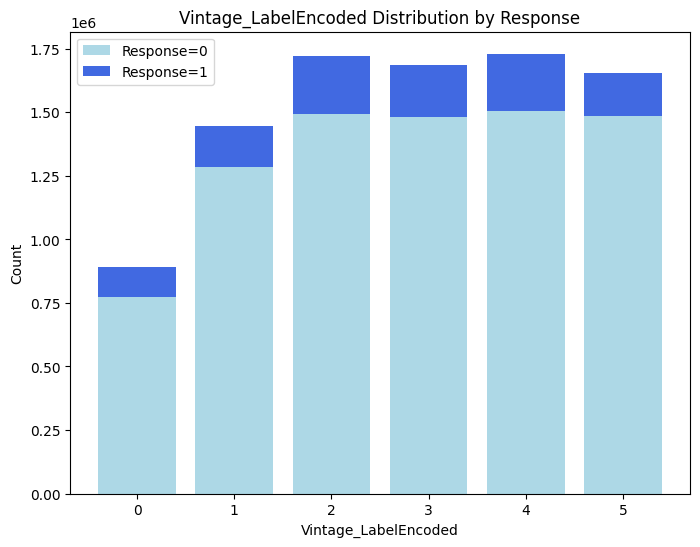

In [95]:
# Responseごとに指定されたカラムの値をカウントする
Vintage_LabelEncoded_response_counts = df_cleaned.groupby(['Vintage_LabelEncoded', 'Response']).size().unstack(fill_value=0)

# 棒グラフを作成
plt.figure(figsize=(8, 6))

# Response=0のバーを描画
plt.bar(Vintage_LabelEncoded_response_counts.index, Vintage_LabelEncoded_response_counts[0], color='lightblue', label='Response=0')

 # Response=1のバーを描画
plt.bar(Vintage_LabelEncoded_response_counts.index, Vintage_LabelEncoded_response_counts[1], bottom=Vintage_LabelEncoded_response_counts[0], color='royalblue', label='Response=1')

    # グラフのタイトルとラベルを設定
plt.title('Vintage_LabelEncoded Distribution by Response')
plt.xlabel('Vintage_LabelEncoded')
plt.xticks(rotation=0)
plt.ylabel('Count')    # 凡例を追加
plt.legend()

    # グラフを表示
plt.show()

In [96]:
df_cleaned

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,AP_LabelEncoded,Vintage_LabelEncoded
1,1,0,2,1,28.00,0,2,1,58911.00,26.00,288,1,5,5
2,2,1,0,1,14.00,1,0,0,38043.00,152.00,254,0,3,5
4,4,1,1,1,15.00,1,1,0,31951.00,152.00,294,0,3,5
5,5,1,1,1,47.00,1,0,0,28150.00,152.00,197,0,2,3
6,6,0,0,1,45.00,1,0,0,27128.00,152.00,190,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11504792,11504792,0,1,1,28.00,1,1,0,29974.00,154.00,201,0,2,4
11504793,11504793,0,2,1,6.00,0,1,1,27412.00,26.00,218,0,2,4
11504794,11504794,1,0,1,36.00,0,0,1,29509.00,152.00,115,1,2,2
11504796,11504796,1,2,1,28.00,0,1,1,48443.00,26.00,274,1,4,5


In [97]:
df_test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,AP_LabelEncoded,Vintage_LabelEncoded
0,11504798,1,0,1,47.00,0,0,0,2630.00,160.00,228,0,4
1,11504799,0,2,1,28.00,0,1,1,37483.00,124.00,123,3,2
2,11504800,0,2,1,43.00,0,1,1,2630.00,26.00,271,0,5
3,11504801,1,0,1,47.00,1,0,0,24502.00,152.00,115,2,2
4,11504802,0,2,1,19.00,0,1,0,34115.00,124.00,148,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7669861,19174659,0,3,1,28.00,0,1,1,51661.00,124.00,109,5,2
7669862,19174660,0,0,1,50.00,1,0,0,25651.00,152.00,184,2,3
7669863,19174661,0,2,1,33.00,1,1,0,2630.00,138.00,63,0,1
7669864,19174662,0,0,1,28.00,0,0,1,38866.00,124.00,119,3,2


In [98]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9127525 entries, 1 to 11504797
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                int64  
 2   Age                   int32  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           int64  
 7   Vehicle_Damage        int64  
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
 12  AP_LabelEncoded       int64  
 13  Vintage_LabelEncoded  int64  
dtypes: float64(3), int32(1), int64(10)
memory usage: 1009.7 MB


In [99]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7669866 entries, 0 to 7669865
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                int64  
 2   Age                   int32  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           int64  
 7   Vehicle_Damage        int64  
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  AP_LabelEncoded       int64  
 12  Vintage_LabelEncoded  int64  
dtypes: float64(3), int32(1), int64(9)
memory usage: 731.5 MB


In [100]:
# データフレームの欠損値の状態を確認する
missing_values = df_cleaned.isnull().sum()

# 欠損値の総数や各列ごとの欠損値の数を表示する
print("欠損値の総数:", missing_values.sum())
print("各列ごとの欠損値の数:")
print(missing_values)


欠損値の総数: 0
各列ごとの欠損値の数:
id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
AP_LabelEncoded         0
Vintage_LabelEncoded    0
dtype: int64


In [101]:
# データフレームの欠損値の状態を確認する
missing_values = df_test.isnull().sum()

# 欠損値の総数や各列ごとの欠損値の数を表示する
print("欠損値の総数:", missing_values.sum())
print("各列ごとの欠損値の数:")
print(missing_values)


欠損値の総数: 0
各列ごとの欠損値の数:
id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
AP_LabelEncoded         0
Vintage_LabelEncoded    0
dtype: int64


# EDA

In [118]:
feature_names_eda = [
    'Response',
    'Gender',
    'Age',
    'Driving_License',
    'Region_Code',
    'Previously_Insured',
    'Vehicle_Age',
    'Vehicle_Damage',
    'Policy_Sales_Channel',
    'AP_LabelEncoded',
    'Vintage_LabelEncoded']

df_feature = df_cleaned[feature_names_eda]
df_feature

,Response,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,AP_LabelEncoded,Vintage_LabelEncoded
1,1,0,2,1,28.00,0,2,1,26.00,5,5
2,0,1,0,1,14.00,1,0,0,152.00,3,5
4,0,1,1,1,15.00,1,1,0,152.00,3,5
5,0,1,1,1,47.00,1,0,0,152.00,2,3
6,0,0,0,1,45.00,1,0,0,152.00,2,3
...,...,...,...,...,...,...,...,...,...,...,...
11504792,0,0,1,1,28.00,1,1,0,154.00,2,4
11504793,0,0,2,1,6.00,0,1,1,26.00,2,4
11504794,1,1,0,1,36.00,0,0,1,152.00,2,2
11504796,1,1,2,1,28.00,0,1,1,26.00,4,5


In [119]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9127525 entries, 1 to 11504797
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Response              int64  
 1   Gender                int64  
 2   Age                   int32  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           int64  
 7   Vehicle_Damage        int64  
 8   Policy_Sales_Channel  float64
 9   AP_LabelEncoded       int64  
 10  Vintage_LabelEncoded  int64  
dtypes: float64(2), int32(1), int64(8)
memory usage: 800.8 MB


In [124]:
df_feature.corr()

,Response,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,AP_LabelEncoded,Vintage_LabelEncoded
Response,1.00,-0.06,0.14,0.01,0.02,-0.36,0.25,0.38,-0.19,0.07,-0.01
Gender,-0.06,1.00,-0.17,0.02,-0.00,0.10,-0.18,-0.11,0.13,-0.06,0.01
Age,0.14,-0.17,1.00,-0.08,0.05,-0.32,0.79,0.33,-0.62,0.24,-0.01
Driving_License,0.01,0.02,-0.08,1.00,-0.00,0.02,-0.04,-0.02,0.04,-0.02,-0.00
Region_Code,0.02,-0.00,0.05,-0.00,1.00,-0.03,0.05,0.03,-0.05,-0.02,-0.01
Previously_Insured,-0.36,0.10,-0.32,0.02,-0.03,1.00,-0.43,-0.87,0.30,-0.15,0.02
Vehicle_Age,0.25,-0.18,0.79,-0.04,0.05,-0.43,1.00,0.44,-0.62,0.24,-0.02
Vehicle_Damage,0.38,-0.11,0.33,-0.02,0.03,-0.87,0.44,1.00,-0.31,0.15,-0.02
Policy_Sales_Channel,-0.19,0.13,-0.62,0.04,-0.05,0.30,-0.62,-0.31,1.00,-0.22,0.01
AP_LabelEncoded,0.07,-0.06,0.24,-0.02,-0.02,-0.15,0.24,0.15,-0.22,1.00,0.00


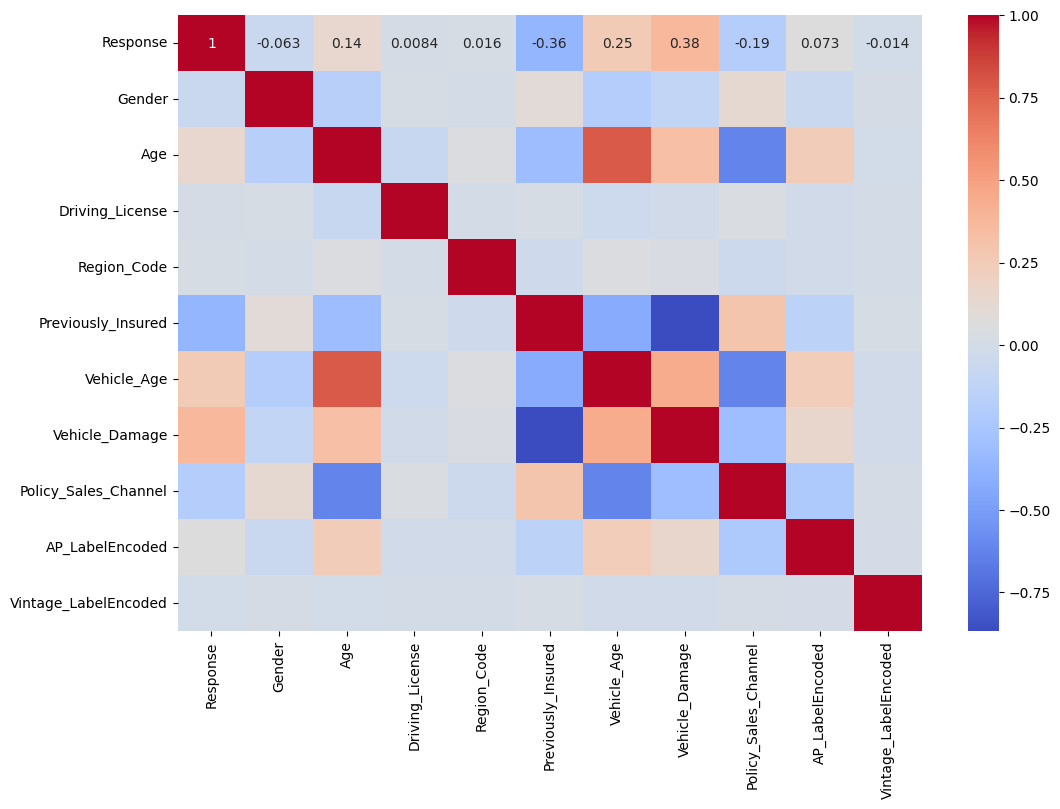

In [123]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_feature.corr(), annot=True, cmap='coolwarm')
plt.show()


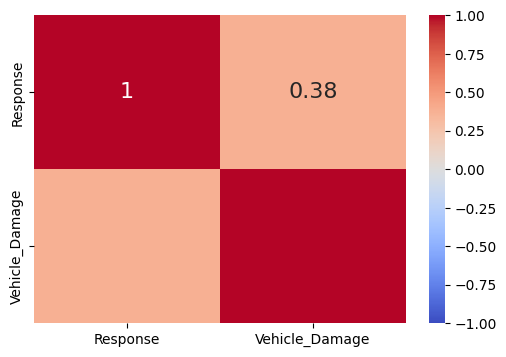

In [129]:
# 特定の列だけを抽出
df_subset = df_feature[['Response', 'Vehicle_Damage']]

# 相関行列を計算
corr_matrix = df_subset.corr()

# ヒートマップを作成
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 16})
plt.show()

* 目的変数Responseとの相関
    * 正の相関
        * Vehicle_Damage 0.38
            * 解釈
                * 車両損傷yes:1かno:0でラベルエンコーディング
                * yes,noの分布はほぼ同じ
                * 車両損傷がyesの場合、Responceが好意的な人の割合が多い。
                * これは感覚的にも同意できる。
            * 仮説

        * Vihicle_Age 0.25
        * Age 0.14
    * 負の相関
        * Previously_Insured -0.36
        * Policy_Sales_Channel -0.19
        
* Genderとの相関
    * 正の相関
        * Policy_Sales_Channel 0.13
        * Previously_Insured 0.10
    * 負の相関
        * Vehicle_Age -0.18
        * Age -0.17
        * Vehicle_Damage -0.11

* Ageとの相関
    * 正の相関
        * Vihicle_Age 0.79
        * Vehicle_Damage 0.33
        * AP_LabelEncoded 0.24
    * 負の相関
        * Policy_Sales_Channel -0.62
        * Previously_Insured -0.32

* Driving_Licenseとの相関
    * 特筆すべき相関なし

* Region_Codeとの相関
    * 特筆すべき相関なし

* Previously_Insuredとの相関
    * 正の相関
        * Policy_Sales_Channel 0.30
    * 負の相関
        * Vehicle_Damage -0.87
        * Vehicle_Age -0.43
        * AP_LabelEncoded	-0.15

* Vehicle_Ageとの相関
    * 正の相関
        * Vehicle_Damage 0.44
        * AP_LabelEncoded 0.24
    * 負の相関
        * Policy_Sales_Channel	-0.62

* Vehicle_Damageとの相関
    * 正の相関
        * AP_LabelEncoded 0.15
    * 負の相関
        * Policy_Sales_Channel -0.31

* Policy_Sales_Channelとの相関
    * Policy_Sales_Channel -0.22

* AP_LabelEncodedとの相関
    * 特筆すべき相関なし

---

# モデル構築と学習

## 特徴量の準備

In [256]:
list_columns_train = df_cleaned.columns.tolist()
print(list_columns_train)
print(len(list_columns_train))

['id', 'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response', 'AP_LabelEncoded', 'Vintage_LabelEncoded']
14


In [257]:
list_columns_test = df_test.columns.tolist()
print(list_columns_test)
print(len(list_columns_test))

['id', 'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'AP_LabelEncoded', 'Vintage_LabelEncoded']
13


In [159]:
feature_names = [
    'Gender',
    'Age',
    'Driving_License',
    'Region_Code',
    'Previously_Insured',
    'Vehicle_Age',
    'Vehicle_Damage',
    'Policy_Sales_Channel',
    'AP_LabelEncoded',
    'Vintage_LabelEncoded']

X = df_cleaned[feature_names]
y = df_cleaned['Response']

In [142]:
import pandas as pd 
import optuna
import math
import numpy as np 
import seaborn as sns 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import *
from sklearn.preprocessing import *
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import *
import warnings 

In [145]:
SEED = 42
n_splits = 10

def Train_ML(model, X, y):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=SEED)
    train_scores = []
    val_scores = []

    for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
        X_train, X_val = X.iloc[train_index], X.iloc[test_index]
        y_train, y_val = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        y_train_pred_proba = model.predict_proba(X_train)[:, 1]
        train_auc = roc_auc_score(y_train, y_train_pred_proba)
        train_scores.append(train_auc)

        y_val_pred_proba = model.predict_proba(X_val)[:, 1]
        val_auc = roc_auc_score(y_val, y_val_pred_proba)
        val_scores.append(val_auc)

        print(f"Fold {fold}: Train AUC = {train_auc:.4f}, Validation AUC = {val_auc:.4f}")

    mean_train_auc = np.mean(train_scores)
    mean_val_auc = np.mean(val_scores)

    print(f"\nMean Train AUC: {mean_train_auc:.4f}")
    print(f"Mean Validation AUC: {mean_val_auc:.4f}")

    return model, train_scores, val_scores

In [146]:
%%time

lgbParams = {'n_estimators': 1000,
             'max_depth': 25, 
             'learning_rate': 0.025,
             'min_child_weight': 3.43,
             'min_child_samples': 216, 
             'subsample': 0.782,
             'subsample_freq': 4, 
             'colsample_bytree': 0.29, 
             'num_leaves': 21}


model = LGBMClassifier(**lgbParams,
                       random_state=SEED,
                       verbose=-1,
                       device='gpu')

trained_model, train_scores, val_scores = Train_ML(model, X, y)

Fold 1: Train AUC = 0.8701, Validation AUC = 0.8704
Fold 2: Train AUC = 0.8702, Validation AUC = 0.8698
Fold 3: Train AUC = 0.8702, Validation AUC = 0.8696
Fold 4: Train AUC = 0.8700, Validation AUC = 0.8707
Fold 5: Train AUC = 0.8701, Validation AUC = 0.8701
Fold 6: Train AUC = 0.8702, Validation AUC = 0.8694
Fold 7: Train AUC = 0.8700, Validation AUC = 0.8708
Fold 8: Train AUC = 0.8701, Validation AUC = 0.8705
Fold 9: Train AUC = 0.8702, Validation AUC = 0.8697
Fold 10: Train AUC = 0.8702, Validation AUC = 0.8692

Mean Train AUC: 0.8701
Mean Validation AUC: 0.8700
CPU times: total: 9h 42min 7s
Wall time: 1h 31min 46s


In [147]:
import joblib
joblib.dump(trained_model, 'model.pkl')

['model.pkl']

---

# モデルの評価

---

# 予測と提出用データの作成

In [259]:
feature_names

['Gender',
 'Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Policy_Sales_Channel',
 'AP_LabelEncoded',
 'Vintage_LabelEncoded']

In [262]:
df_test_no_id = df_test[feature_names]
df_test_no_id

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,AP_LabelEncoded,Vintage_LabelEncoded
0,1,0,1,47.00,0,0,0,160.00,0,4
1,0,2,1,28.00,0,1,1,124.00,3,2
2,0,2,1,43.00,0,1,1,26.00,0,5
3,1,0,1,47.00,1,0,0,152.00,2,2
4,0,2,1,19.00,0,1,0,124.00,3,2
...,...,...,...,...,...,...,...,...,...,...
7669861,0,3,1,28.00,0,1,1,124.00,5,2
7669862,0,0,1,50.00,1,0,0,152.00,2,3
7669863,0,2,1,33.00,1,1,0,138.00,0,1
7669864,0,0,1,28.00,0,0,1,124.00,3,2


In [263]:
import joblib
# 保存したモデルの読み込み
trained_model = joblib.load('model.pkl')

# モデルを使用して予測を行う
Test_pred = trained_model.predict_proba(df_test_no_id)[:, 1]

# 予測結果と 'id' 列を含むデータフレームを作成
df_Submission = pd.DataFrame({
    'id': df_test['id'],  # 'id' 列を再度追加する
    'Response': Test_pred
})

# CSVファイルとして出力
df_Submission.to_csv('Submission_LGBM_1.csv', index=False)

# 先頭のデータを表示して確認
df_Submission.head()

,id,Response
0,11504798,0.01
1,11504799,0.30
2,11504800,0.28
3,11504801,0.00
4,11504802,0.04


* 提出するファイルは、
    * 7669866 行とヘッダーを含む
    * CSV または Parquetファイルである
    * カラムがid,Responseで構成

In [276]:
print('dfは提出条件を満たしていますか？')
print()

if len(df_Submission) == 7669866 and list(df_Submission.columns) == ['id', 'Response']:
    print('YES!! 今すぐSubmit it!')
else:
    print('NO')

dfは提出条件を満たしていますか？

YES!! 今すぐSubmit it!


---

# 結果の記録

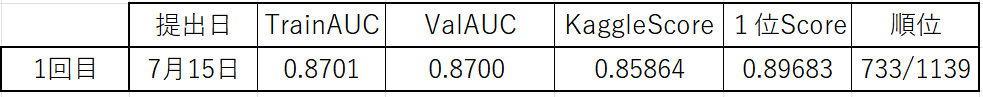

In [4]:
from PIL import Image
img = Image.open('サブミット記録/一回目のサブミット.png')
img

* 参考URL
    * KaggleNoteBook
        * [PS4E7 | Modeling + Submission](https://www.kaggle.com/code/abdmental01/ps4e7-modeling-submission)
    * Qiita
        * [Kaggle奮闘録(Titanic編3) -LightGBMによる分類-](https://qiita.com/bazz0907/items/cd489ca054961cac11bb)
        * [Kaggle Titanic Score_80.8%までの道のり](https://qiita.com/yk777/items/3a455b39d0a371a05519)